<a href="https://colab.research.google.com/github/saakethk/machine-learning-research/blob/main/DecisionTreesTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:** is to implement following on a simple classification dataset.
  - decision tree
  - random forest
  - xgboost

**Dataset:** https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset
- This dataset has two columns: text and spam
  - text: unprocessed text
  - spam: 0 is not spam and 1 is spam (unbalanced - more spam than not)

In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

""" Make getting data easier """

def get_dataset(name: str, data_path: str, delimiter: str):
    # Get data, load into pandas, and return dataframe
    path = kagglehub.dataset_download(name)
    full_path = f"{path}/{data_path}"
    return pd.read_csv(full_path, on_bad_lines='skip', delimiter=delimiter) # The on bad lines just prevents reading corrupted vals

def get_dataset_partitioned(name: str, data_path: str, delimiter: str, x_column: str, y_column: str, test_ratio: float, random_state: int):
  # Gets data, splits data
  data = get_dataset(
      name=name,
      data_path=data_path,
      delimiter=delimiter
  )
  data.dropna(subset=[x_column, y_column], inplace=True)
  x_data = data[x_column]
  y_data = data[y_column]
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_ratio, random_state=random_state)
  return (x_train, x_test, y_train, y_test)

In [ ]:
import numpy as np

""" Gets partitioned data """
x_train, x_test, y_train, y_test = get_dataset_partitioned(
    name="jackksoncsie/spam-email-dataset",
    data_path="emails.csv",
    delimiter=",",
    x_column="text",
    y_column="spam",
    test_ratio=0.3,
    random_state=67
)
print(x_train)
print(y_train)

Using Colab cache for faster access to the 'spam-email-dataset' dataset.
1245    Subject: peace tree designs : creating extraor...
1972    Subject: re : thursday night ' s dinner ( and ...
4058    Subject: re : marketpoint license agreement  d...
997     Subject: fantastic investors info  maisonette ...
1009    Subject: localized software , all languages av...
                              ...                        
5001    Subject: worth a careful reading  best regards...
2055    Subject: proposed bonuses  greg ,  these are p...
1738    Subject: re : check  julie ,  yes , this is ho...
4917    Subject: fwd : mark - to - market  return - pa...
2883    Subject: prob of default for e rating 7 as of ...
Name: text, Length: 4009, dtype: object
1245    1
1972    0
4058    0
997     1
1009    1
       ..
5001    0
2055    0
1738    0
4917    0
2883    0
Name: spam, Length: 4009, dtype: int64


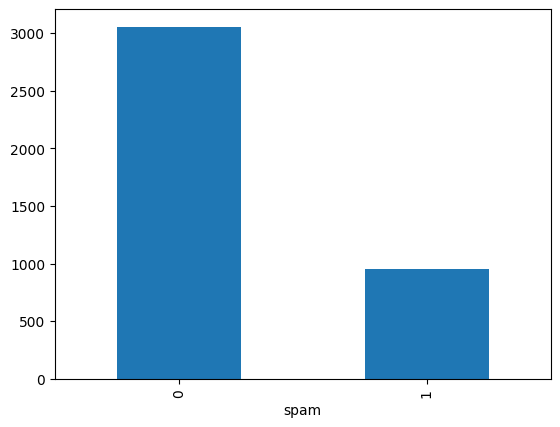

In [ ]:
import matplotlib.pyplot as plt

""" Helps visualize classification data """
y_train.value_counts().plot.bar()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

""" Creates pipeline for different models """
dt_pipe = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", DecisionTreeClassifier())
])
rf_pipe = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", RandomForestClassifier())
])

params = {
    'objective':'reg:logistic'
}
xgb_pipe = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", XGBClassifier(**params))
])

In [ ]:
from sklearn import metrics

""" Helps with model evaluation """
def evaluate_model(pipeline):
  pipeline.fit(x_train, y_train)
  predictions = pipeline.predict(x_test)
  print(metrics.classification_report(y_test, predictions))

In [ ]:
evaluate_model(dt_pipe)
evaluate_model(rf_pipe)
evaluate_model(xgb_pipe)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1305
           1       0.91      0.90      0.91       414

    accuracy                           0.96      1719
   macro avg       0.94      0.94      0.94      1719
weighted avg       0.96      0.96      0.96      1719

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1305
           1       1.00      0.86      0.92       414

    accuracy                           0.97      1719
   macro avg       0.98      0.93      0.95      1719
weighted avg       0.97      0.97      0.96      1719

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1305
           1       0.96      0.95      0.96       414

    accuracy                           0.98      1719
   macro avg       0.97      0.97      0.97      1719
weighted avg       0.98      0.98      0.98      1719



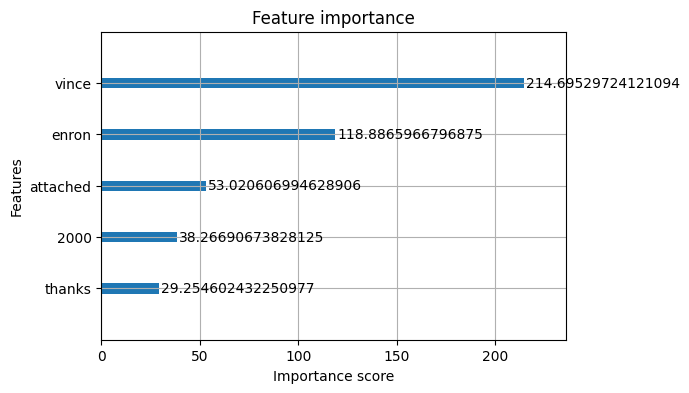

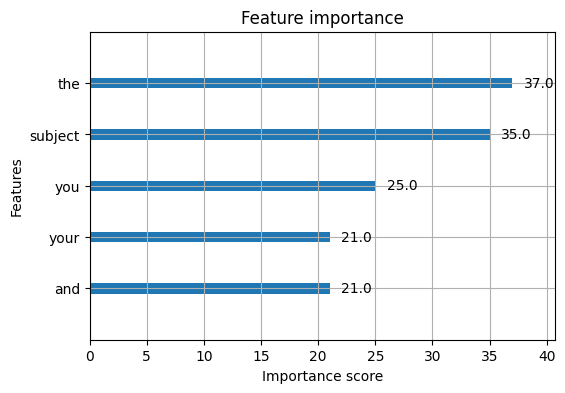

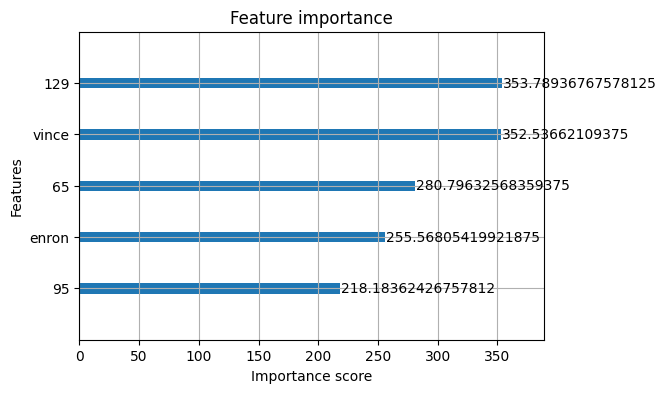

In [58]:
import xgboost as xgb

""" Visualizing model results more """
feature_names = xgb_pipe.named_steps["tfidf"].get_feature_names_out()
xgb_pipe.named_steps["clf"].get_booster().feature_names = list(feature_names)
xgb.plot_importance(xgb_pipe.named_steps["clf"], max_num_features=5, importance_type="gain")
xgb.plot_importance(xgb_pipe.named_steps["clf"], max_num_features=5, importance_type="weight")
xgb.plot_importance(xgb_pipe.named_steps["clf"], max_num_features=5, importance_type="cover")
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

**Thoughts:** The results show that there is a clear improvement from the normal decision tree to the random forest model but there is no difference between the random forest model and the XGBoost tree model. I'm gonna try testing with a different dataset to see if it works better.

I found larger dataset: https://www.kaggle.com/datasets/ahsenwaheed/youtube-comments-spam-dataset

In [59]:
""" Testing whether XGBoost is better than random forest """
x_train, x_test, y_train, y_test = get_dataset_partitioned(
    name="ahsenwaheed/youtube-comments-spam-dataset",
    data_path="Youtube-Spam-Dataset.csv",
    delimiter=",",
    x_column="CONTENT",
    y_column="CLASS",
    test_ratio=0.3,
    random_state=67
)

100%|██████████| 159k/159k [00:00<00:00, 43.4MB/s]

Extracting files...


In [62]:
rf_pipe = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", RandomForestClassifier())
])
params = {
    'objective':'reg:logistic'
}
xgb_pipe = Pipeline([
  ("tfidf", TfidfVectorizer()),
  ("clf", XGBClassifier(**params))
])

In [63]:
evaluate_model(rf_pipe)
evaluate_model(xgb_pipe)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       277
           1       1.00      0.94      0.97       310

    accuracy                           0.97       587
   macro avg       0.97      0.97      0.97       587
weighted avg       0.97      0.97      0.97       587

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       277
           1       0.97      0.92      0.95       310

    accuracy                           0.95       587
   macro avg       0.95      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587

